In [1]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import codecs
with codecs.open("data/rules.csv", "r", "Shift-JIS", "ignore") as file:
    rules = pd.read_table(file, delimiter=",")

In [2]:
classifier_df = pd.DataFrame(index = range(130))
#classifiers = {}
for filename in os.listdir("./data/rule importance/"):
    filepath = "./data/rule importance/" + filename
    df = pd.read_csv(filepath)

    classifier_df[filename] = df['rule_id']

In [20]:
classifier_df

rules_00.csv         rules_01.csv         rules_02.csv  \
0    5237260000000836259  5237260000000939134  5237260000000836259   
1    5237260000000939134  5237260000000836259  5237260000000939134   
2    5237260000000836261             HIT_FLG5  5237260000000836261   
3               HIT_FLG5  5237260000000836261             HIT_FLG5   
4    5237260000000836231  5237260000000836231  5237260000000836231   
5    5237260000000836238  5237260000000836238  5237260000000836238   
6               HIT_FLG3             HIT_FLG3             HIT_FLG3   
7               HIT_FLG6             HIT_FLG6             HIT_FLG6   
8    5237260000000939117  5237260000000939117  5237260000001063213   
9    5237260000001063213  5237260000001063213  5237260000000939117   
10   5237260000001063233             HIT_FLG2             HIT_FLG2   
11   5237260000000939113  5237260000001063233  5237260000000939113   
12              HIT_FLG2  5237260000000939113  5237260000001063233   
13              HIT_FLG8             HIT_FLG8  5237260000000935173   
14   5237260000000935173  5237260000000836149  5237260000000836149   
15   5237260000000836149  5237260000000935173             HIT_FLG8   
16   5237260000000836142  5237260000000836142  5237260000000836142   
17   5237260000000938853             HIT_FLG4  5237260000000938853   
18              HIT_FLG4  5237260000000938853             HIT_FLG4   
19   5237260000000939175  5237260000000939175  5237260000000939175   
20   5237260000001025233  5237260000001025233  5237260000001025233   
21   5237260000000933894  5237260000000933894  5237260000000933894   
22   5237260000000939253  5237260000000836262  5237260000000939253   
23   5237260000000836262  5237260000000939253  5237260000000939248   
24   5237260000000939248  5237260000000939248  5237260000000836262   
25   5237260000000933893  5237260000000933893  5237260000000933893   
26   5237260000000933901  5237260000000933901  5237260000000939255   
27   5237260000000836370  5237260000000836370  5237260000000933901   
28   5237260000000836145  5237260000000939255  5237260000000836145   
29   5237260000000939255  5237260000000836145  5237260000000836370   
..                   ...                  ...                  ...   
100  5237260000000939196  5237260000000939196  5237260000000939241   
101  5237260000000836146  5237260000000836146  5237260000000939221   
102  5237260000000939221  5237260000000939241  5237260000000939225   
103  5237260000000836153  5237260000000939219  5237260000000939154   
104  5237260000000939225  5237260000000836153  5237260000000939203   
105  5237260000000939096  5237260000000836147  5237260000001081293   
106  5237260000000939154  5237260000000939221  5237260000000939219   
107  5237260000000939214  5237260000001081293  5237260000000836159   
108  5237260000001081293  5237260000000939214  5237260000000935293   
109  5237260000000939203  5237260000000939096  5237260000000939214   
110  5237260000000933934  5237260000000933934  5237260000000939096   
111  5237260000000836147  5237260000000935293  5237260000000939201   
112  5237260000000939219  5237260000000939203  5237260000000836147   
113  5237260000000836159  5237260000000935213  5237260000000836153   
114  5237260000000935213  5237260000000939154  5237260000000935213   
115  5237260000000935293  5237260000001018073  5237260000000933934   
116  5237260000001018073  5237260000000935174  5237260000000939197   
117  5237260000000939197  5237260000000836148  5237260000000836146   
118  5237260000000939201  5237260000000939225  5237260000001018073   
119  5237260000000836148  5237260000000836235  5237260000000935174   
120  5237260000000935174  5237260000000939197  5237260000000836157   
121  5237260000001063215  5237260000000939201  5237260000000933958   
122  5237260000000836235  5237260000000933958  5237260000000836151   
123  5237260000000836151  5237260000000836157  5237260000000933915   
124  5237260000000836157  5237260000000939218  5237260000000939218   
125  52372600000009339

In [21]:
list_jaccard_dict = {}

for column1 in classifier_df.columns.values:
    column1_dict = {}
    
    for column2 in classifier_df.columns.values:
        if column1 == column2:
            jaccard = 1
            column1_dict[column2] = jaccard
            
        else:
            intersection = (len(pd.merge(classifier_df[column1].dropna().to_frame(),
                                         classifier_df[column2].dropna().to_frame(), 
                                        how = 'inner', left_on = column1, right_on = column2)))
            union = len(classifier_df[column1].dropna()) + len(classifier_df[column2].dropna()) - intersection
            jaccard = intersection/union
            column1_dict[column2] = jaccard
        
    
    list_jaccard_dict[column1] = column1_dict
    
jaccard_df = pd.DataFrame.from_dict(list_jaccard_dict)



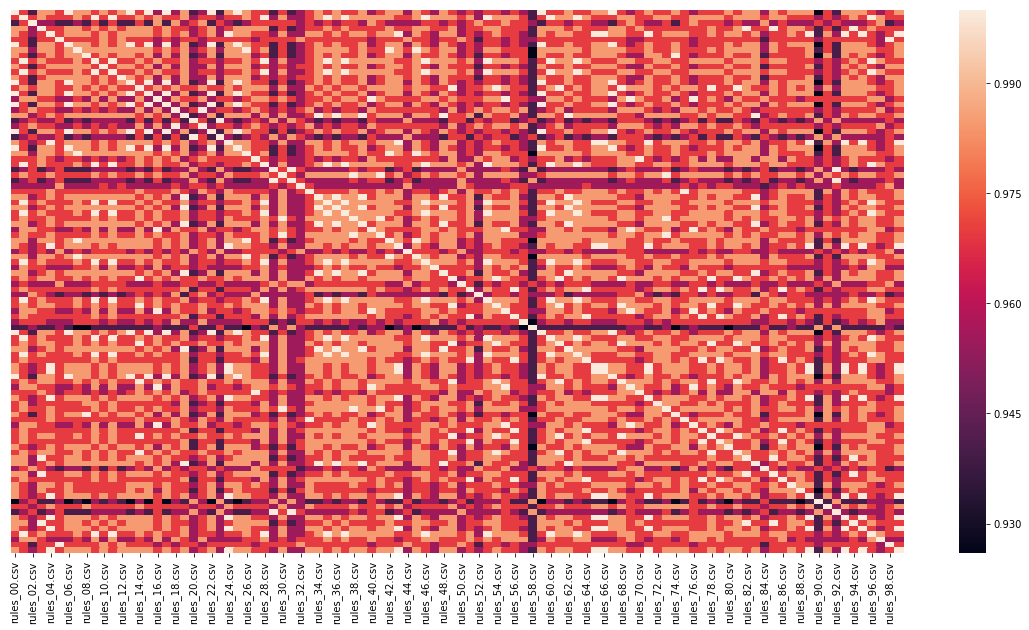

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
datamap = sns.heatmap(jaccard_df, ax=ax, yticklabels = False)
datamap

In [53]:
df = pd.read_csv("./data/rule importance/rules_00.csv",dtype = {'importance': np.float64})

In [54]:
df['rules_00'] = 'rules_00'

In [55]:
df = df.T

In [56]:
df.columns = df.iloc[0]

In [57]:
df=df.reindex(df.index.drop(['rules_00','rule_id'])).rename(index={'importance':''})

In [118]:
df2 = pd.read_csv("./data/rule importance/rules_01.csv",dtype = {'importance': np.float64,'rule_id':np.object})
df2['rules_01'] = 'rules_01'
df2 = df2.T
df2.columns = df2.iloc[0]
df2=df2.reindex(df2.index.drop(['rules_01','rule_id'])).rename(index={'importance':'rules_01'})

In [119]:
df2

rule_id  5237260000000939134 5237260000000836259           HIT_FLG5  \
rules_01   0.133764858107743   0.129420954186467  0.116030250190572   

rule_id  5237260000000836261 5237260000000836231 5237260000000836238  \
rules_01   0.111361770873399  0.0712028330501346  0.0459615111800319   

rule_id             HIT_FLG3            HIT_FLG6 5237260000000939117  \
rules_01  0.0355140020678113  0.0306675575950597  0.0249500553867453   

rule_id  5237260000001063213   ...    5237260000001112953 5237260000001113833  \
rules_01  0.0242407572123521   ...                      0                   0   

rule_id  5237260000001113894 5237260000001113895 5237260000001113896  \
rules_01                   0                   0                   0   

rule_id  5237260000001113897 5237260000001113898 5237260000001118133 HIT_FLGB  \
rules_01                   0                   0                   0        0   

rule_id  HIT_FLGE  
rules_01        0  

[1 rows x 317 columns]

In [60]:
df0 = pd.DataFrame()
pd.concat([df0,df,df2])

C:\Users\maxime.menu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


5237260000000836140 5237260000000836141 5237260000000836142  \
          0.000382185354766122                   0  0.0125210925950261   
rules_01  0.000323865871546046                   0  0.0142577046475774   

         5237260000000836143 5237260000000836144  5237260000000836145  \
                           0                   0  0.00327432057186251   
rules_01                   0                   0  0.00340833300781836   

           5237260000000836146   5237260000000836147   5237260000000836148  \
          1.30312072778631e-05  5.07876518572415e-06  1.81100963654469e-06   
rules_01  1.51768742164787e-05  8.26087071689265e-06  1.72809854938102e-06   

         5237260000000836149         ...                     HIT_FLG6  \
           0.015016677706603         ...           0.0318389532627619   
rules_01  0.0155869344735378         ...           0.0306675575950597   

                     HIT_FLG7            HIT_FLG8              HIT_FLG9  \
           0.0021375661170918  0.0163423946196318  0.000957854778332272   
rules_01  0.00224433153635067  0.0159385511528897  0.000989795517085871   

                     HIT_FLGA HIT_FLGB             HIT_FLGC  \
          0.00207527265813973        0  0.00261901968973124   
rules_01   0.0020055565877256        0  0.00234233734022011   

                      HIT_FLGD HIT_FLGE             HIT_FLGF  
          0.000207423528932786        0  0.00148258783745356  
rules_01  0.000206960490301888        0  0.00152088357302125  

[2 rows x 317 columns]

In [3]:
pd.set_option('precision',15)

class_df = pd.DataFrame()

for filename in os.listdir("./data/rule importance/"):
    filepath = "./data/rule importance/" + filename
    csv_ind = filename.find('.csv')
    col1 = filename[0:csv_ind]
    ex = (pd.read_csv(filepath, dtype = {'importance': np.float64,'rule_id':np.object}))
    ex[col1] = col1
    ex = ex.T
    ex.columns = ex.iloc[0]
    ex = ex.reindex(ex.index.drop([col1,'rule_id'])).rename(index={'importance': col1})
    class_df = class_df.append(ex)
    
class_df = class_df.fillna(0)
class_df

C:\Users\maxime.menu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


5237260000000836140  5237260000000836141  5237260000000836142  \
rules_00    0.000382185354766                  0.0    0.012521092595026   
rules_01    0.000323865871546                  0.0    0.014257704647577   
rules_02    0.000368676442630                  0.0    0.012344818301192   
rules_03    0.000338213215376                  0.0    0.014176292583370   
rules_04    0.000362632366388                  0.0    0.013060502988730   
rules_05    0.000376393629429                  0.0    0.014724324781745   
rules_06    0.000366645886126                  0.0    0.013816726073785   
rules_07    0.000379310308147                  0.0    0.012825126269324   
rules_08    0.000408540361340                  0.0    0.012222127756473   
rules_09    0.000367316257157                  0.0    0.013094191701862   
rules_10    0.000363380822040                  0.0    0.013493655286918   
rules_11    0.000318273256143                  0.0    0.013059400326404   
rules_12    0.000418779635484                  0.0    0.012503658142234   
rules_13    0.000374094139556                  0.0    0.012007677962575   
rules_14    0.000370904521163                  0.0    0.011997420830491   
rules_15    0.000407608144899                  0.0    0.012122579366875   
rules_16    0.000386294853942                  0.0    0.013450876552232   
rules_17    0.000380289108100                  0.0    0.011804869214592   
rules_18    0.000331102912359                  0.0    0.011548741217431   
rules_19    0.000404204595809                  0.0    0.012031414060908   
rules_20    0.000334404883760                  0.0    0.013116244028904   
rules_21    0.000357379865759                  0.0    0.011541782148527   
rules_22    0.000357529959750                  0.0    0.011316637882638   
rules_23    0.000391259674155                  0.0    0.012832657187659   
rules_24    0.000361400167953                  0.0    0.012460269613638   
rules_25    0.000353852961292                  0.0    0.011753019939038   
rules_26    0.000356793775788                  0.0    0.012526690275253   
rules_27    0.000373653063862                  0.0    0.011743732830071   
rules_28    0.000361665452074                  0.0    0.013935062902358   
rules_29    0.000348351855865                  0.0    0.011468087196905   
...                       ...                  ...                  ...   
rules_70    0.000375990160199                  0.0    0.012835177780268   
rules_71    0.000416607254751                  0.0    0.014956007145576   
rules_72    0.000352917870508                  0.0    0.012602568122180   
rules_73    0.000407791070189                  0.0    0.012759253480293   
rules_74    0.000351776085139                  0.0    0.012295451729600   
rules_75    0.000372066611407                  0.0    0.012080769929820   
rules_76    0.000381491838641                  0.0    0.012107472455614   
rules_77    0.000410444750187                  0.0    0.012076173558995   
rules_78    0.000367143677867                  0.0    0.012104404089569   
rules_79    0.000376715566022                  0.0    0.011282056592052   
rules_80    0.000369201390867                  0.0    0.011705653169325   
rules_81    0.000368366587080                  0.0    0.012395037128684   
rules_82    0.000388397897494                  0.0    0.011832672131830   
rules_83    0.000359387382354                  0.0    0.012593422316562   
rules_84    0.000360336360530                  0.0    0.012632821296185   
rules_85    0.000343011324766                  0.0    0.012639523037315   
rules_86    0.000386669066199                  0.0    0.013115937248124   
rules_87    0.000383724589749                  0.0    0.011912151279677   
rules_88    0.000389005729173                  0.0    0.013032268361861   
rules_89    0.000372481527316                  0.0    0.012575675258617   
rules_90    0.000357770718670                  0.0    0.012658573812428   
rules_91    0.000356154786149      

In [4]:
av = class_df.mean().sort_values(ascending = False)
av = pd.DataFrame(av)

In [101]:
av.to_csv('data/rule ranking.csv')

In [11]:
import codecs
with codecs.open("data/rules.csv", "r", "Shift-JIS", "ignore") as file:
    rules = pd.read_table(file, delimiter=",")

In [5]:
av.reset_index(level=0, inplace=True)

In [6]:
av.columns = ['rule_id','importance']

In [124]:
merge_df = pd.merge(av,rules, on = 'rule_id', how='inner')

In [127]:
merge_df.to_csv('data/ranked rules.csv',index=False)

In [6]:
classifier_df = pd.DataFrame(index = range(50))
#classifiers = {}
for filename in os.listdir("./data/all_rule_importance_logreg/"):
    filepath = "./data/all_rule_importance_logreg/" + filename
    df = pd.read_csv(filepath)

    classifier_df[filename] = df['rule_id']

In [7]:
list_jaccard_dict = {}

for column1 in classifier_df.columns.values:
    column1_dict = {}
    
    for column2 in classifier_df.columns.values:
        if column1 == column2:
            jaccard = 1
            column1_dict[column2] = jaccard
            
        else:
            intersection = (len(pd.merge(classifier_df[column1].dropna().to_frame(),
                                         classifier_df[column2].dropna().to_frame(), 
                                        how = 'inner', left_on = column1, right_on = column2)))
            union = len(classifier_df[column1].dropna()) + len(classifier_df[column2].dropna()) - intersection
            jaccard = intersection/union
            column1_dict[column2] = jaccard
        
    
    list_jaccard_dict[column1] = column1_dict
    
jaccard_df = pd.DataFrame.from_dict(list_jaccard_dict)

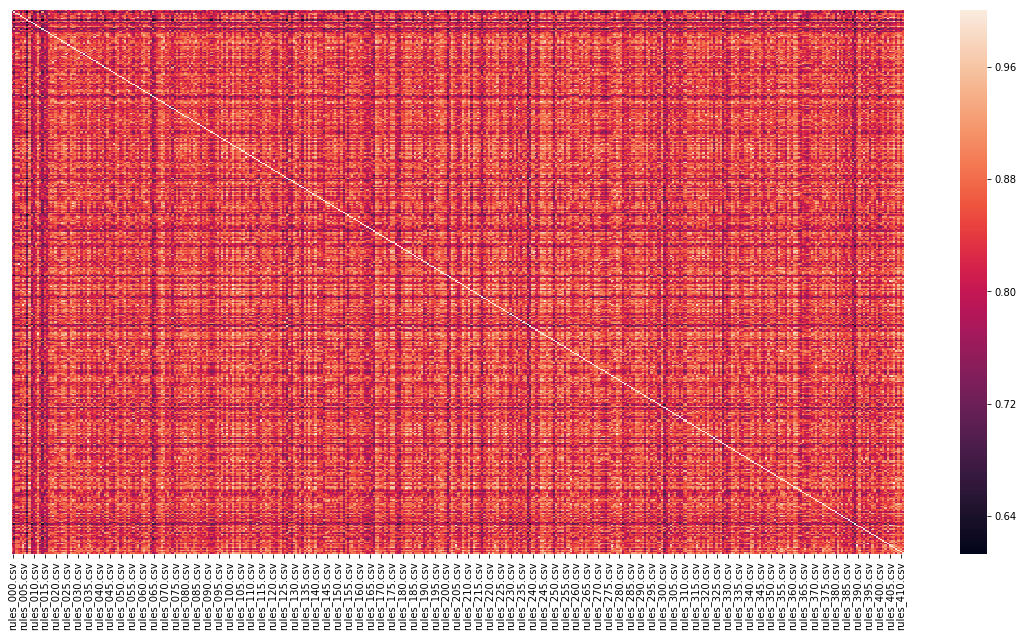

In [8]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
datamap = sns.heatmap(jaccard_df, ax=ax, yticklabels = False)
datamap

In [95]:
class_df = pd.DataFrame()

for filename in os.listdir("./data/all_rule_importance_logreg/"):
    filepath = "./data/all_rule_importance_logreg/" + filename
    csv_ind = filename.find('.csv')
    col1 = filename[0:csv_ind]
    ex = (pd.read_csv(filepath, dtype = {'importance': np.float64,'rule_id':np.object}))
    ex[col1] = col1
    ex = ex.T
    ex.columns = ex.iloc[0]
    ex = ex.reindex(ex.index.drop([col1,'rule_id'])).rename(index={'importance': col1})
    class_df = class_df.append(ex)
    
class_df = class_df.fillna(0)
class_df

C:\Users\maxime.menu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


5237260000000836140  5237260000000836141  5237260000000836142  \
rules_000             1.570853                  0.0            -4.074001   
rules_001             2.654708                  0.0            -5.527123   
rules_002             2.834893                  0.0            -4.702298   
rules_003             2.135731                  0.0            -4.728780   
rules_004             2.504330                  0.0            -4.693856   
rules_005             1.480253                  0.0            -3.866485   
rules_006             1.586431                  0.0            -4.890539   
rules_007             2.124769                  0.0            -3.842916   
rules_008             2.489878                  0.0            -5.236994   
rules_009             2.520321                  0.0            -6.009384   
rules_010             1.459104                  0.0            -5.370222   
rules_011             2.869613                  0.0            -5.005766   
rules_012             1.829833                  0.0            -5.107615   
rules_013             1.815177                  0.0            -4.540602   
rules_014             2.845454                  0.0            -3.960232   
rules_015             1.708471                  0.0            -6.090735   
rules_016             1.862621                  0.0            -5.513876   
rules_017             2.379520                  0.0            -6.220742   
rules_018             2.019229                  0.0            -5.414010   
rules_019             2.458926                  0.0            -3.806849   
rules_020             1.623803                  0.0            -5.106283   
rules_021             2.170255                  0.0            -4.798840   
rules_022             2.147239                  0.0            -5.012474   
rules_023             1.877741                  0.0            -5.393876   
rules_024             1.308793                  0.0            -5.564954   
rules_025             1.931398                  0.0            -6.763348   
rules_026             2.907529                  0.0            -5.235679   
rules_027             2.363735                  0.0            -5.961027   
rules_028             2.230871                  0.0            -5.879719   
rules_029             2.487034                  0.0            -5.774173   
...                        ...                  ...                  ...   
rules_970             2.965479                  0.0            -4.803406   
rules_971             2.428238                  0.0            -5.142033   
rules_972             2.797334                  0.0            -4.777772   
rules_973             2.085012                  0.0            -5.936570   
rules_974             1.952893                  0.0            -5.243831   
rules_975             1.514983                  0.0            -6.142390   
rules_976             1.997040                  0.0            -4.992160   
rules_977             2.057002                  0.0            -5.818582   
rules_978             2.511559                  0.0            -4.666180   
rules_979             2.713881                  0.0            -5.177980   
rules_980             2.072740                  0.0            -5.852018   
rules_981             2.281938                  0.0            -5.794768   
rules_982             2.220609                  0.0            -5.322318   
rules_983             1.806655                  0.0            -5.999414   
rules_984             2.008465                  0.0            -5.666970   
rules_985             1.516984                  0.0            -4.567742   
rules_986             2.834777                  0.0            -4.814557   
rules_987             2.354680                  0.0            -5.999646   
rules_988             2.518913                  0.0            -4.782062   
rules_989             2.104998                  0.0            -5.556487   
rules_990             2.926725                  0.0        

In [188]:
av = class_df.mean().sort_values(ascending = False)
av = pd.DataFrame(av)
av.reset_index(level=0, inplace=True)

In [189]:
av.columns = ['rule_id','importance']
merge_df = pd.merge(av,rules, on = 'rule_id', how='inner')
merge_df.to_csv('data/ranked_all_rules_logreg.csv',index=False)

In [190]:
av

rule_id  importance
0    5237260000000939248    4.869841
1    5237260000000836259    3.557300
2    5237260000000836231    3.544386
3    5237260000000933901    2.734299
4    5237260000000939255    2.710756
5    5237260000000836238    2.606528
6    5237260000000836140    2.188839
7    5237260000000836383    2.174147
8    5237260000000836145    2.003305
9    5237260000001025233    1.917378
10   5237260000000939247    1.567084
11   5237260000000836366    1.536877
12   5237260000000939249    1.431321
13   5237260000000836382    1.426127
14   5237260000000939117    1.239037
15   5237260000000836380    1.231830
16   5237260000000836337    1.213637
17   5237260000000933893    0.966857
18   5237260000001063213    0.902277
19                Flag_E    0.761880
20   5237260000001063234    0.718074
21   5237260000000939054    0.698212
22   5237260000000836339    0.531915
23   5237260000000836149    0.408880
24   5237260000000836381    0.369805
25   5237260000000939013    0.331939
26                Flag_Q    0.248111
27                Flag_9    0.158587
28   5237260000000935093    0.115655
29   5237260000000836338    0.108754
..                   ...         ...
307  5237260000000933874   -0.682689
308  5237260000000939244   -0.727919
309  5237260000000836370   -0.775418
310               Flag_V   -0.931751
311  5237260000000836150   -0.933893
312  5237260000000939243   -0.981883
313  5237260000001015756   -0.988392
314               Flag_6   -1.101836
315  5237260000000933895   -1.114640
316  5237260000000939175   -1.163189
317               Flag_S   -1.312797
318  5237260000000836367   -1.324671
319               Flag_C   -1.481315
320               Flag_8   -1.489006
321  5237260000000836336   -1.585717
322  5237260000000836374   -1.606708
323  5237260000000836368   -1.663339
324  5237260000000836261   -1.663971
325  5237260000000939113   -1.831997
326  5237260000001015754   -1.966827
327  5237260000000933894   -1.975884
328               Flag_A   -2.023618
329  5237260000000938853   -2.414046
330  5237260000000935173   -2.560183
331               Flag_4   -2.618004
332               Flag_1   -2.924256
333               Flag_G   -3.006652
334  5237260000000939134   -3.691271
335               Flag_B   -4.405375
336  5237260000000836142   -5.314795

[337 rows x 2 columns]

In [13]:
def removescore(x):
    rules= []
    for i in range(len(x)-1):
        rules.append(x[i].split(':')[0])
    return rules

In [186]:
fraud_df = pd.read_csv('data/Jalan_Ext_Tran_Chargeback_JIR_JALAN_20180625152817.csv',usecols=['トランザクションID','トリップしたルール'],
                      encoding='SHIFT-JIS')
fraud_df['トリップしたルール'] = fraud_df['トリップしたルール'].str.split(';')
fraud_df.dropna(inplace=True)
fraud_df['トリップしたルール'] = fraud_df.apply(lambda x: removescore(x['トリップしたルール']),axis=1)

In [187]:
normal_df = pd.read_csv('data/Jalan_Ext_Tran_Not_Chargeback_JIR_JALAN_20180625161404.csv',usecols=['トランザクションID','トリップしたルール'],
                      encoding='SHIFT-JIS')
normal_df['トリップしたルール'] = normal_df['トリップしたルール'].str.split(';')
normal_df.dropna(inplace=True)
normal_df['トリップしたルール'] = normal_df.apply(lambda x: removescore(x['トリップしたルール']),axis=1)

In [191]:
av = av[av['importance'] != 0]
av['abs_OR'] = np.exp(np.absolute(av['importance']))
av['log'] = np.log(np.absolute(av['importance']))

C:\Users\maxime.menu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\maxime.menu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [165]:
10357.56 // 1s

10357.0

In [240]:
def calculatePrevious(x,scores):
    tripped_df = pd.DataFrame(x['トリップしたルール'])
    tripped_df.columns = ['rule_id']
    tripped_score = pd.merge(tripped_df,unchangeable,on='rule_id',how='inner')
    return tripped_score['score'].sum()

def calculateTotal(x,scores,i,c):
    tripped_df = pd.DataFrame(x['トリップしたルール'])
    tripped_df.columns = ['rule_id']
    tripped_score = pd.merge(tripped_df,av,on='rule_id',how='inner')
    tripped_score['score'] = (tripped_score['abs_OR'] * -i * np.sign(tripped_score['importance']) + c)//100*100
    return tripped_score['score'].sum()

def comparescore(x,compare):
    if compare == '<':
        if x['total'] < 5000:
            return 1
        else:
            return 0
    elif compare == '>':
        if x['total'] >= 5000:
            return 1
        else:
            return 0
        
def getPredictionCounts(data,scores,i,comp,c=0):
    data['total'] = data.apply(lambda x: calculateTotal(x,scores,i,c),axis=1)
    data['prediction_correct'] = data.apply(lambda x: comparescore(x,comp),axis = 1)
    correct = data['prediction_correct'].value_counts()
    if 0 not in correct.index.values:
        correct[0] = 0
    elif 1 not in correct.index.values:
        correct[1] = 0

    return correct

In [193]:
fraud_df['previous_rules_total'] = fraud_df.apply(lambda x: calculatePrevious(x,unchangeable),axis=1)
normal_df['previous_rules_total'] = normal_df.apply(lambda x: calculatePrevious(x,unchangeable),axis=1)

NameError: ("name 'unchangeable' is not defined", 'occurred at index 0')

In [194]:
fraud_df

トランザクションID                                          トリップしたルール
0     20171030191432542620  [5237260000000935273, 5237260000000935276, 523...
1     20170926230253030541  [5237260000000933893, 5237260000000933894, 523...
2     20170929132002070256  [5237260000000836364, 5237260000000836368, 523...
3     20170929134720070633  [5237260000000836367, 5237260000000933893, 523...
4     20171001212518106469  [5237260000000939247, 5237260000000933893, 523...
5     20171001234015109436  [5237260000000935194, 5237260000000935273, 523...
6     20171001234230109475  [5237260000000935194, 5237260000000935273, 523...
7     20171003210610141759  [5237260000000836365, 5237260000000836369, 523...
8     20171003211035141860  [5237260000000836365, 5237260000000836369, 523...
9     20171018152503366243  [5237260000000939246, 5237260000000836367, 523...
10    20171024151004454379  [5237260000000836367, 5237260000000836371, 523...
11    20171027164213498644  [5237260000000939246, 5237260000000836365, 523...
12    20171028003620505082  [5237260000000935273, 5237260000000935276, 523...
13    20171028003748505092  [5237260000000935273, 5237260000000935276, 523...
14    20171215185828175385  [5237260000000939254, 5237260000000939245, 523...
15    20171220234638240156  [5237260000000939247, 5237260000000933893, 523...
16    20180109230406474021  [5237260000000939255, 5237260000000933901, 523...
17    20171031100423550611  [5237260000000935273, 5237260000000935274, 523...
18    20171031215534560178  [5237260000000935214, 5237260000000935274, 523...
19    20171031223511561044  [5237260000000935213, 5237260000000935274, 523...
20    20171101224813577401  [5237260000000935275, 5237260000001015756, 523...
21    20180109225718473884  [5237260000000939255, 5237260000000933901, 523...
22    20171028004347505132  [5237260000000935273, 5237260000000935276, 523...
23    20171030104727535197         [5237260000000836261, 5237260000000939117]
24    20171030190723542536  [5237260000001015756, 5237260000000939253, 523...
25    20171031095654550524  [5237260000000935173, 5237260000000939253, 523...
26    20171108234903678665  [5237260000000939253, 5237260000000939255, 523...
27    20171129140644955743  [5237260000001025233, 5237260000000939255, 523...
28    20171016123604332518  [5237260000000939246, 5237260000000836367, 523...
29    20171018164356367303  [5237260000000939246, 5237260000000836364, 523...
...                    ...                                                ...
1744  20180201214613830899  [5237260000000933893, 5237260000000933894, 523...
1745  20180201220226831274  [5237260000000933895, 5237260000000836238, 523...
1746  20180201230744832654  [5237260000000933895, 5237260000000836238, 523...
1747  20180201231107832715  [5237260000000939254, 5237260000000933895, 523...
1748  20180202000544833754  [5237260000000836149, 5237260000000836261, 523...
1749  20180202002246833994  [5237260000000933893, 5237260000000933894, 523...
1750  20180202002545834036  [5237260000000933893, 5237260000000933894, 523...
1751  20180202131122839255  [5237260000000939253, 5237260000000933893, 523...
1752  20180202131734839344  [5237260000000939253, 5237260000000933893, 523...
1753  20180203010714850143  [5237260000000939247, 5237260000000933894, 523...
1754  20180203011004850163  [5237260000000939247, 5237260000000933894, 523...
1755  20180203011539850202  [5237260000000939247, 5237260000000933893, 523...
1756  20180204190925874764  [5237260000000939254, 5237260000000933895, 523...
1757  20180204191535874870  [5237260000000939247, 5237260000000836238, 523...
1758  20180422210142151938  [5237260000001063213, 5237260000001063233, 523...
1759  20180423222313172339  [5237260000001063213, 5237260000001063233, 523...
1760  20180504221306347071  [5237260000000939247, 5237260000000836336, 523...
1761  20180504222906347299  [5237260000000939254, 5237260000000939247, 523...
1762  20180508121437394992  [5237260000000939254, 5237260000000939247, 523...
1763  20180510163531430597  [523726000

In [255]:
%%time
fraud_df['total'] = fraud_df.apply(lambda x: calculateTotal(x,av,400,0),axis=1)

Wall time: 8.45 s


In [256]:
fraud_df['prediction_correct'] = fraud_df.apply(lambda x: comparescore(x,'>'),axis=1)

In [257]:
fraud_correct = fraud_df['prediction_correct'].value_counts()

In [258]:
fraud_correct

1    1260
0     514
Name: prediction_correct, dtype: int64

In [214]:
%%time
normal_sample = normal_df.sample(frac=0.1)

Wall time: 258 ms


In [260]:
%%time
normal_df['total'] = normal_df.apply(lambda x: calculateTotal(x,av,400,0),axis=1)

Wall time: 43min 27s


In [261]:
normal_df['prediction_correct'] = normal_df.apply(lambda x: comparescore(x,'<'),axis=1)

In [262]:
normal_correct = normal_df['prediction_correct'].value_counts()

In [263]:
normal_correct

1    592316
0      1011
Name: prediction_correct, dtype: int64

In [135]:
#fraud_correct[1] = 0

In [264]:
cm = [[fraud_correct[1],fraud_correct[0]],[normal_correct[0],normal_correct[1]]]

In [265]:
cm

[[1260, 514], [1011, 592316]]

In [266]:
calcFscore(cm)

0.622991347342398

In [267]:
calcAccuracy(cm)

0.9974374097842215

In [275]:
calcFPR(cm)*100

0.1703950772508246

In [276]:
calcTPR(cm)*100

71.02593010146562

In [270]:
stdcm(cm)

[[0.7102593010146562, 0.2897406989853439],
 [0.0017039507725082458, 0.9982960492274917]]

In [40]:
def calcFscore(cm):
    return 2*cm[0][0]/(2*cm[0][0] + cm[1][0] + cm[0][1])

def calcTPR(cm):
    return cm[0][0]/(cm[0][0] + cm[0][1])

def calcFPR(cm):
    return cm[1][0]/(cm[1][0] + cm[1][1])

def calcAccuracy(cm):
    return (cm[0][0] + cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

def stdcm(cm):
    total1 = cm[1][0] + cm[1][1]
    total0 = cm[0][1] + cm[0][0]
    
    return [[cm[0][0]/total0,cm[0][1]/total0],[cm[1][0]/total1,cm[1][1]/total1]]

In [118]:
import time
def simulate(fraud,normal_df,count):
    simulation = []
    path = 'data/simulation_results_all2.csv'
    
    header = ('multiplication factor' + '\t' + 'addition factor' + '\t' + 'f1 score' + '\t' 
              + 'accuracy' + '\t' + 'FPR' + '\t' + 'TPR' + '\n')
    with open(path, 'w') as md:
        md.write(header)
        
    for i in range(520,720,20):
        
        j = 0
        normal = normal_df.sample(frac=0.1)
        t1 = time.clock()
        #data,scores,i,comp,c=0
        fraud_correct  = getPredictionCounts(data = fraud, scores = av, i = i, comp='>', c = j)
        normal_correct = getPredictionCounts(data = normal,scores = av, i = i, comp = '<', c = j)
        cm = [[fraud_correct[1],fraud_correct[0]],[normal_correct[0],normal_correct[1]]]
        f = calcFscore(cm)
        tpr = calcTPR(cm)
        fpr = calcFPR(cm)
        a = calcAccuracy(cm)
        res = (i,j,f,a)
        simulation.append(res)

        # print metadata to txt file
        iterresults = (str(i)  + '\t' + str(j) + '\t' + str(f) + '\t' + str(a) + '\t' + str(fpr) + '\t' + str(tpr) + '\n')

        with open(path, 'a') as md:
            md.write(iterresults)

        m, s = divmod((time.clock()-t1), 60)
        h, m = divmod(m, 60)
        print(f)
        print ('runtime: ' + "%d:%02d:%02d" % (h, m, s))

    return simulation
    

In [126]:
%%time
res = simulate(fraud_df,normal_df,av)

0.8286240786240786
runtime: 0:04:16


KeyboardInterrupt: 

In [271]:
av['rule score'] = av['abs_OR'] * -400 * np.sign(av['importance'])//100*100

C:\Users\maxime.menu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [272]:
av

rule_id  importance      abs_OR       log  rule score
0    5237260000000939248    4.869841  130.300208  1.583061    -52200.0
1    5237260000000836259    3.557300   35.068402  1.269002    -14100.0
2    5237260000000836231    3.544386   34.618422  1.265365    -13900.0
3    5237260000000933901    2.734299   15.398943  1.005875     -6200.0
4    5237260000000939255    2.710756   15.040641  0.997228     -6100.0
5    5237260000000836238    2.606528   13.551923  0.958019     -5500.0
6    5237260000000836140    2.188839    8.924846  0.783371     -3600.0
7    5237260000000836383    2.174147    8.794677  0.776636     -3600.0
8    5237260000000836145    2.003305    7.413514  0.694798     -3000.0
9    5237260000001025233    1.917378    6.803100  0.650959     -2800.0
10   5237260000000939247    1.567084    4.792650  0.449216     -2000.0
11   5237260000000836366    1.536877    4.650046  0.429753     -1900.0
12   5237260000000939249    1.431321    4.184223  0.358598     -1700.0
13   5237260000000836382    1.426127    4.162546  0.354962     -1700.0
14   5237260000000939117    1.239037    3.452287  0.214334     -1400.0
15   5237260000000836380    1.231830    3.427496  0.208501     -1400.0
16   5237260000000836337    1.213637    3.365702  0.193621     -1400.0
17   5237260000000933893    0.966857    2.629665 -0.033705     -1100.0
18   5237260000001063213    0.902277    2.465210 -0.102834     -1000.0
19                Flag_E    0.761880    2.142300 -0.271966      -900.0
20   5237260000001063234    0.718074    2.050480 -0.331183      -900.0
21   5237260000000939054    0.698212    2.010156 -0.359232      -900.0
22   5237260000000836339    0.531915    1.702189 -0.631271      -700.0
23   5237260000000836149    0.408880    1.505130 -0.894335      -700.0
24   5237260000000836381    0.369805    1.447453 -0.994778      -600.0
25   5237260000000939013    0.331939    1.393667 -1.102805      -600.0
26                Flag_Q    0.248111    1.281602 -1.393880      -600.0
27                Flag_9    0.158587    1.171854 -1.841452      -500.0
28   5237260000000935093    0.115655    1.122608 -2.157146      -500.0
29   5237260000000836338    0.108754    1.114889 -2.218663      -500.0
..                   ...         ...         ...       ...         ...
307  5237260000000933874   -0.682689    1.979193 -0.381715       700.0
308  5237260000000939244   -0.727919    2.070768 -0.317565       800.0
309  5237260000000836370   -0.775418    2.171499 -0.254354       800.0
310               Flag_V   -0.931751    2.538952 -0.070689      1000.0
311  5237260000000836150   -0.933893    2.544396 -0.068393      1000.0
312  5237260000000939243   -0.981883    2.669477 -0.018283      1000.0
313  5237260000001015756   -0.988392    2.686910 -0.011676      1000.0
314               Flag_6   -1.101836    3.009688  0.096978      1200.0
315  5237260000000933895   -1.114640    3.048471  0.108532      1200.0
316  5237260000000939175   -1.163189    3.200121  0.151165      1200.0
317               Flag_S   -1.312797    3.716553  0.272160      1400.0
318  5237260000000836367   -1.324671    3.760949  0.281164      1500.0
319               Flag_C   -1.481315    4.398726  0.392930      1700.0
320               Flag_8   -1.489006    4.432686  0.398109      1700.0
321  5237260000000836336   -1.585717    4.882792  0.461037      1900.0
322  5237260000000836374   -1.606708    4.986367  0.474187      1900.0
323  5237260000000836368   -1.663339    5.276902  0.508827      2100.0
324  5237260000000836261   -1.663971    5.280237  0.509207      2100.0
325  5237260000000939113   -1.831997    6.246351  0.605407      2400.0
326  5237260000001015754   -1.966827    7.147962  0.676422      2800.0
327  5237260000000933894   -1.975884    7.212992  0.681016      2800.0
328               Flag_A   -2.023618    7.565649  0.704887      3000.0
329  5237260000000938853   -2.414046   11.179100  0.881304      4400.0
330  5237260000000935173   -2.560183   12.938187  0.940079      5100.0
331               Flag_4   -2.618004   13

In [273]:
merge_df = pd.merge(av,rules, on = 'rule_id', how='outer')
merge_df['importance'] = merge_df['importance'].fillna(0)
merge_df['abs_OR'] = merge_df['abs_OR'].fillna(1)
merge_df['rule score'] = merge_df['rule score'].fillna(0)
merge_df

rule_id  importance      abs_OR       log  rule score  \
0    5237260000000939248    4.869841  130.300208  1.583061    -52200.0   
1    5237260000000836259    3.557300   35.068402  1.269002    -14100.0   
2    5237260000000836231    3.544386   34.618422  1.265365    -13900.0   
3    5237260000000933901    2.734299   15.398943  1.005875     -6200.0   
4    5237260000000939255    2.710756   15.040641  0.997228     -6100.0   
5    5237260000000836238    2.606528   13.551923  0.958019     -5500.0   
6    5237260000000836140    2.188839    8.924846  0.783371     -3600.0   
7    5237260000000836383    2.174147    8.794677  0.776636     -3600.0   
8    5237260000000836145    2.003305    7.413514  0.694798     -3000.0   
9    5237260000001025233    1.917378    6.803100  0.650959     -2800.0   
10   5237260000000939247    1.567084    4.792650  0.449216     -2000.0   
11   5237260000000836366    1.536877    4.650046  0.429753     -1900.0   
12   5237260000000939249    1.431321    4.184223  0.358598     -1700.0   
13   5237260000000836382    1.426127    4.162546  0.354962     -1700.0   
14   5237260000000939117    1.239037    3.452287  0.214334     -1400.0   
15   5237260000000836380    1.231830    3.427496  0.208501     -1400.0   
16   5237260000000836337    1.213637    3.365702  0.193621     -1400.0   
17   5237260000000933893    0.966857    2.629665 -0.033705     -1100.0   
18   5237260000001063213    0.902277    2.465210 -0.102834     -1000.0   
19                Flag_E    0.761880    2.142300 -0.271966      -900.0   
20   5237260000001063234    0.718074    2.050480 -0.331183      -900.0   
21   5237260000000939054    0.698212    2.010156 -0.359232      -900.0   
22   5237260000000836339    0.531915    1.702189 -0.631271      -700.0   
23   5237260000000836149    0.408880    1.505130 -0.894335      -700.0   
24   5237260000000836381    0.369805    1.447453 -0.994778      -600.0   
25   5237260000000939013    0.331939    1.393667 -1.102805      -600.0   
26                Flag_Q    0.248111    1.281602 -1.393880      -600.0   
27                Flag_9    0.158587    1.171854 -1.841452      -500.0   
28   5237260000000935093    0.115655    1.122608 -2.157146      -500.0   
29   5237260000000836338    0.108754    1.114889 -2.218663      -500.0   
..                   ...         ...         ...       ...         ...   
308  5237260000000836359    0.000000    1.000000       NaN         0.0   
309  5237260000000836360    0.000000    1.000000       NaN         0.0   
310  5237260000000836361    0.000000    1.000000       NaN         0.0   
311  5237260000000836362    0.000000    1.000000       NaN         0.0   
312  5237260000000836363    0.000000    1.000000       NaN         0.0   
313  5237260000000836384    0.000000    1.000000       NaN         0.0   
314  5237260000000836385    0.000000    1.000000       NaN         0.0   
315  5237260000000836386    0.000000    1.000000       NaN         0.0   
316  5237260000000836387    0.000000    1.000000       NaN         0.0   
317  5237260000000836388    0.000000    1.000000       NaN         0.0   
318  5237260000000836389    0.000000    1.000000       NaN         0.0   
319  5237260000000836390    0.000000    1.000000       NaN         0.0   
320  5237260000000836391    0.000000    1.000000       NaN         0.0   
321  5237260000000836392    0.000000    1.000000       NaN         0.0   
322  5237260000000836393    0.000000    1.000000       NaN         0.0   
323  5237260000000836394    0.000000    1.000000       NaN         0.0   
324  5237260000000836395    0.000000    1.000000       NaN         0.0   
325               Flag_3    0.000000    1.000000       NaN         0.0   
326               Flag_5    0.000000    1.000000       NaN         0.0   
327               Flag_H    0.000000    1.000000       NaN         0.0   
328               Flag_I    0.000000    1.000000       NaN         0.0   
329               Flag_J    0.000000    1.000000       NaN         0.0   
330               Fla

In [274]:
merge_df.to_csv('data/all_rule_scores_new.csv',columns=['rule_id','rule score','rule_desc'],index=False,encoding='SHIFT-JIS')

In [123]:
res = pd.read_csv('data/simulation_results_all.csv',sep='\t')
res['FPR'] = res['FPR'] * 100
res['TPR'] = res['TPR'] * 100

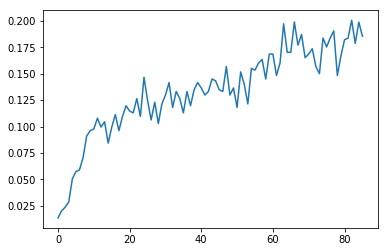

In [124]:
res['FPR'].plot()

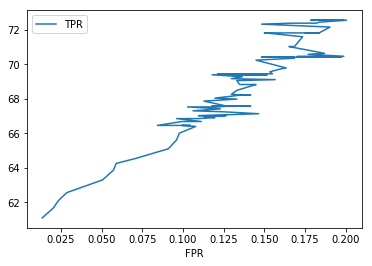

In [125]:
res.plot(x='FPR',y='TPR')